In [30]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [31]:
import tensorflow as tf
from tensorflow.models.rnn import rnn, rnn_cell
import numpy as np
import numpy.random as rng

In [32]:
import pandas.io.data as web
from pykalman import KalmanFilter
import numpy as np
import pandas as pd

In [33]:
def get_prices(symbol):
    start, end = '2007-05-02', '2016-04-11'
    data = web.DataReader(symbol, 'yahoo', start, end)
    data=pd.DataFrame(data)
    prices=data['Adj Close']
    #prices=np.asarray(list(prices))
    prices=prices.astype(float)
    return prices

In [34]:
gs = get_prices('GS')

In [35]:
def get_returns(prices):
    return (prices-prices.shift(-1))/prices

In [36]:
rets = get_returns(gs)

In [37]:
def sort_data(rets, N):
    ins = []
    outs = []
    for i in range(N):
        xx = np.random.randint(len(rets)-100)
        ins.append(rets[xx:xx+100].tolist())
        outs.append(rets[xx+100])
    return np.array(ins), np.array(outs)

In [38]:
rets.shape

(2252,)

In [39]:
ins, outs = sort_data(rets, 1000)


In [40]:
ins.shape

(1000, 100)

In [41]:
outs.shape

(1000,)

#TensorFlow 1

In [42]:
sess = tf.InteractiveSession()

In [43]:
x = tf.placeholder(tf.float32, [None, 100])
y_ = tf.placeholder(tf.float32, [None, 1])

In [44]:
W = tf.Variable(tf.random_normal([100, 1]))
b = tf.Variable(tf.random_normal([1]))

In [45]:
y = tf.matmul(x, W) + b

In [46]:
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
#train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [47]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*1000)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

In [48]:
init = tf.initialize_all_variables()

In [49]:
sess = tf.Session()
sess.run(init)

In [50]:
for epoch in range(2000):
    #batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(optimizer, feed_dict={x: ins, y_: outs.reshape(1,-1).T})
    if (epoch+1)%100== 0:
        c = sess.run(cost, feed_dict={x: ins, y_: outs.reshape(1,-1).T})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            )

Epoch: 0100 cost= 0.030196607
Epoch: 0200 cost= 0.027282355
Epoch: 0300 cost= 0.024723789
Epoch: 0400 cost= 0.022470769
Epoch: 0500 cost= 0.020480912
Epoch: 0600 cost= 0.018718410
Epoch: 0700 cost= 0.017152831
Epoch: 0800 cost= 0.015758371
Epoch: 0900 cost= 0.014512941
Epoch: 1000 cost= 0.013397691
Epoch: 1100 cost= 0.012396432
Epoch: 1200 cost= 0.011495283
Epoch: 1300 cost= 0.010682260
Epoch: 1400 cost= 0.009946959
Epoch: 1500 cost= 0.009280476
Epoch: 1600 cost= 0.008674973
Epoch: 1700 cost= 0.008123679
Epoch: 1800 cost= 0.007620679
Epoch: 1900 cost= 0.007160775
Epoch: 2000 cost= 0.006739443


In [51]:
predict = y

In [52]:
p = sess.run(predict, feed_dict={x: ins})

/Users/liamconnell/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


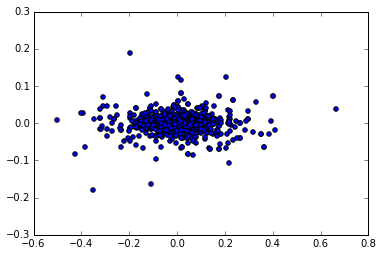

In [53]:
plt.scatter(p,outs)

In [54]:
new_ins, new_outs = sort_data(rets, 1000)

In [55]:
p = sess.run(predict, feed_dict={x: new_ins})

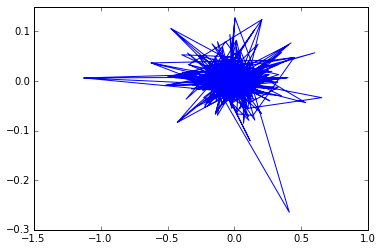

In [56]:
plot(p,new_outs)

In [57]:
from sklearn import linear_model

In [58]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(p,new_outs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(p) - new_outs) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(p, new_outs))

Coefficients: 
 [-0.0052287]
Residual sum of squares: 0.00
Variance score: 0.00
